
# Principal Component Analysis for Dimensionality Reduction

# Introduction

Principal Component Analysis (PCA) is a popular statistical tool for reducing the dimension of a data into a specified smaller dimension, compressing data, visualize data (usually in 2D or 3D), and construct new features from the original data. The goal behind PCA is to be able to work with a low dimensional data set that captures large proportion of the variation found in the original higly dimensional complex data. As the name may hint, PCA is used to find the principal components of the data that explain most of the variation and hence allows us to drop certain components of the data that are redundant (example, height measured in cm, metres, inches, and feet is redundant). Note that PCA does not directly select some important features and drops irrelevant ones, but rather it constructs new features from the given ones that capture the most variation in the data. For example suppose you have test scores on math, science, and reading for students, PCA may summarize this by a new feature (math+science+reading)/3. For comparing students it wont be useful to have characteristics that barely vary across them. PCA will try to linearly combine the given characteristics of students in a way so that the summarized resulting feature varies across students as much as possible.

PCA is considered to be a unsupervised learning algorithm because it does not require a labeled data set. That is there is no need for a categorical outcome variable $y$ that assigns the observations into different categories to apply PCA. In machine learning, PCA is often used to reduce the dimensionality of the data so that classification algorithms can run faster on the smaller data set without sacrificing much classification accuracy.

# Intuition behind PCA
PCA reduces the dimension of the data by projecting it onto a linear subspace of smaller dimension. The figure below illustrates how PCA would transform 2D data into 1D.

Saving PCAbasic.png to PCAbasic (1).png


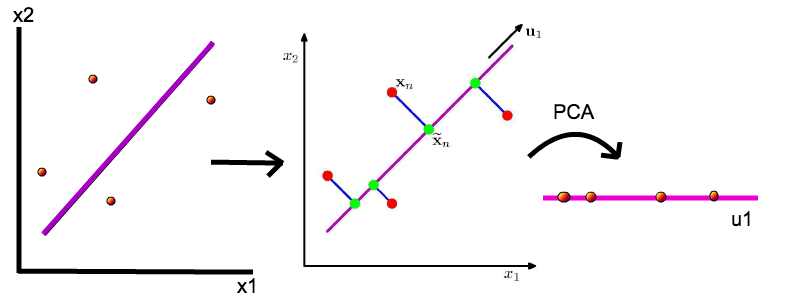

In [7]:
from google.colab import files
uploaded = files.upload()
from IPython.display import Image, display
display(Image(filename='PCAbasic.png', embed=True))


In the figure above, on the left we have 4 data points in two demensional $(x_{1},x_{2})$ space, the upwards sloping purple line represents the 1D subspace that we would to project our data onto in PCA. The middle figure shows the data points in red being projected on the purple line in green. PCA picks the 1D purple line in a way to 1) maximize the variance of the projected green points, and 2) minimize the square of red-green distance ($||x_{n}-\tilde{x_{n}}||^2$, euclidiean squared distance of blue lines). Lastly the figure to the right shows the original 2D data transformed from $(x_{1},x_{2})$ onto 1D, $u_{1}$ (the first principle component) space. This intuition of PCA projecting 2D data onto a 1D line can also generalize similarly to projecting 3D data onto a 2D plane shown below.

Saving download.png to download (2).png


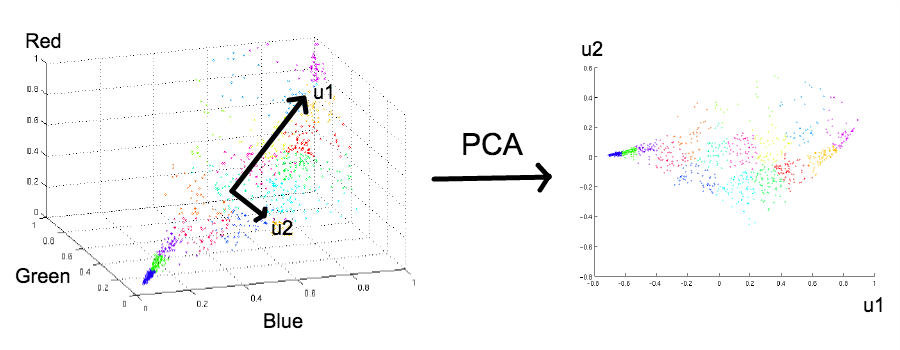

In [12]:
from google.colab import files
uploaded = files.upload()
from IPython.display import Image, display
display(Image(filename='download.png', embed=True))

Notice from the above figure that PCA requires two principal components $(u_{1},u_{2})$ to project 3D data from $(R,G,B)$ space to 2D, $(u_{1},u_{2})$ space. In PCA, the first principal component ($u_{1}$) is found in the direction of highest variability and is a linear combination of the original features that captures the most variation in the data. The second principal component ($u_{2}$) is uncorrealted with $u_{1}$ (that is $u_{1}$ is orthognal to $u_{2}$) and is also a linear combination of the original features that captures the second most variation in the data. The number of possible principal components is equal to the orginal dimension of the data, to reduce the size of the data set we will drop the principal components that explain the lowest amounts of variation in the data. For example to covert from 3D to 2D in the above plot, the third and final principal component ($u_{3}$) is dropped (note $u_{3}$ is not shown in above plot).

Essentionally what PCA is doing is partioning the variance in q-dimensional feature space $(x_{1}, x_{2}, \ldots, x_{q})$ by using $q$ principal components $(u_{1}, u_{2}, \ldots, u_{q})$ which are linear combinations of the origninal features. Then if we want to reduce the data to $p$-dimensions ($p &lt; q$) we can just drop the principal components $(u_{p+1}, \ldots, u_{q}$) and project the original data onto the linear subspace spanned by $(u_{1}, \ldots, u_{p}).$ For PCA it conveniently turns out that when determining the principal components, 1) the maximal variance of the projected data, and 2) minimal squared error are simultaneously achieved the same time. This idea is illustrated in the figure below.

Saving img.png to img (1).png


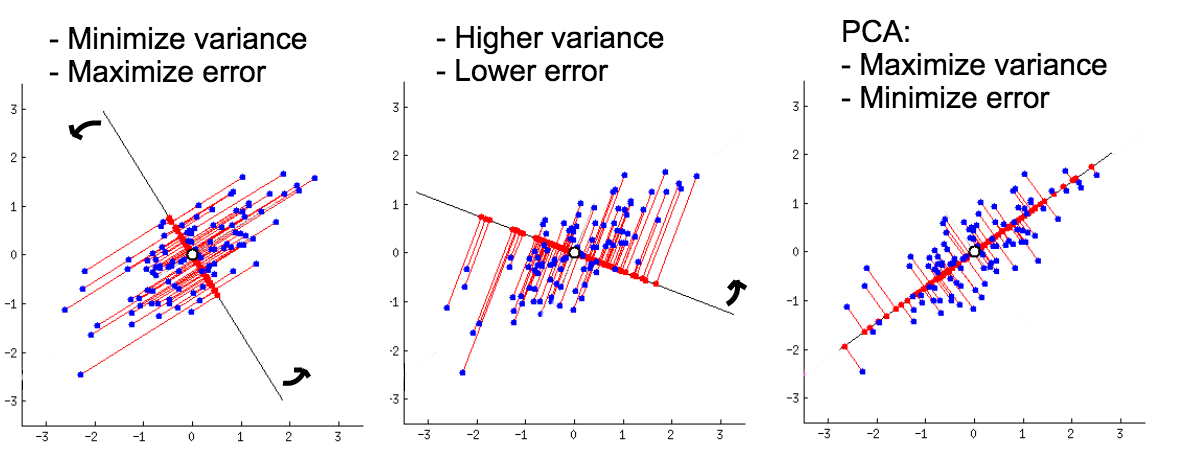

In [14]:
from google.colab import files
uploaded = files.upload()
from IPython.display import Image, display
display(Image(filename='img.png', embed=True))


The figure above illustrates how PCA selects the first principal component (the black line) to project 2D data onto 1D line. Recall that the first principal component 1) maximize the variance of the projected data, 2) minimizes the square of euclidean distance between data and their projections. This is clearly not happening in the left figure as the projected data seems to be a bunched around the center of the line and error distances seem to be large. If we rotate the line counter clock wise, then we notice from the middle figure that the projected data seems to spread out, and the error overall seems to decrease. The right most figure shows the first principal component resulting from PCA, the errors seem relatively small, and the projected data is spread out on the 1D space. Therefore we have informally shown that minimizing the sum of squares projected error is equivalent to maximizing the variance of the projected data for finding principal components.

# Mathematical formulation of PCA
We will now show how the problem of solving for principal components discussed above is equivalent to solving a simple linear algbera problem. Let $X = [x_{1}, x_{2}, \ldots, x_{k}]$ be a $n \times k$ data matrix with $n$ observations, and $k$ features for each observation,

$$
X
=
\begin{bmatrix}
    x_{11} &amp; \ldots &amp; x_{k1}\\
    \vdots &amp; \vdots &amp; \vdots \\
    x_{12} &amp; \ldots &amp; x_{k2}\\
    x_{1n} &amp; \ldots &amp; x_{kn}
\end{bmatrix}. 
$$
The covariance matrix of $X$ will be $\Sigma = E((X-E(X))'(X-E(X))).$ In PCA, the data is usually demeaned to have a mean of 0 (E(X) = 0,more on this later) and hence we can simplify the $Cov(X) = \Sigma = \frac{1}{n-1}X'X.$ Let $u_{1}$ be the first principal component of dimension $k \times 1,$ where $u_{1} = \theta_{11}x_{1} + \theta_{21}x_{2} + \ldots + \theta_{k1}x_{k}$ (linear combination of the original data features). In PCA, $u_{1}$ is chosen such that it maximizes the variance of the projected observations of $X$ onto $u$, $Xu$ a $n \times 1$ vector. As discussed above, in PCA 1) maximizing the variance of the projected data is equivalent to 2) minimize the euclidean sum of squares projected error. Note that $Var(Xu_{1}) = \frac{1}{n-1}u_{1}'X'Xu_{1} = u_{1}'\Sigma u_{1},$ and now we can use this to formalize 1) maximimize variance of projected data idea. To compute $u_{1},$ we will solve the following optimization problem $$max_{u_{1}} u_{1}' \Sigma u_{1}, \text{subject to} \ ||u_{1}|| = u_{1}'u_{1} = 1.$$ Note the constraint $||u_{1}|| = 1$ is required because otherwise we can get improper solutions by mechanically increasing the variance of the projected data. The above problem says we would like to a find a unit vector $u$ such that it is in the direction of highest variability in the data. Recalling the lagarangian from calculus, we re-write the above constrained optimization problem as $$max_{u_{1}} \left\{u_{1}' \Sigma u_{1} - \lambda(u_{1}'u_{1}-1)\right\},$$ where $\lambda$ is the lagrange multiplier. Differentiation with respect to $u$ to solve the above problem results in the following equation, $$\Sigma u_{1} = \lambda_{1} u_{1}.$$ Recall from linear algbera that $u_{1}$ is a eigenvector of $\Sigma$, and $\lambda_{1}$ is its eigenvalue. Therefore we have converted the problem of finding $u_{1}$ such that it 1) maximizes projected data variance, and 2) minimizes sum of square projected errors into a simple linear algebra problem. Notice that if we substitute our solution $\Sigma u_{1} = \lambda_{1} u_{1}$ into our original objective we get $$max_{u_{1}} (u_{1}' \Sigma u_{1}) = max_{u_{1}}(u_{1}' \lambda_{1}u_{1}) = max_{u_{1}}(\lambda_{1}u_{1}'u_{1}) = max_{u_{1}}\lambda_{1},$$ because $u_{1}'u_{1} = 1.$ Therefore the first principal component $u_{1}$ is the eigenvector of $\Sigma$ which corresponds to the largest eigenvalue $\lambda_{1}.$ Similarly the second principal component $u_{2}$ will be the eigenvector of $\Sigma$ which is paired with the second largest eigenvalue $\lambda_{2}.$ The resulting eigenvalues are actually proportional to the proportion of explained variance by their corresponding principal comonponent (more on this below), hence $\lambda_{1} &gt; \lambda_{2}$. We can similarly find all other principal components.

# Problem and Data Description
We will use the Pima Indian Diabetes data set which contains several characteristics of women atleast 21 years old of Pima indian heritage and whether they have been tested positive for diabetes. In particular for several womens we know the number of pregnancies, glucose level, blood pressure, skin thickness, insulin level, body mass index (BMI), age, and a diabetes pedigree index which is a measure of the likelihood of getting diabities based on their ancestor's history. This data is $8$-dimensional (it has 8 features), we will use PCA to visualize this data in 2D and 3D space, and examine whether the dimensionality of this data can be reduced in a way to keep vast majority of the original variation.

In [0]:
# For matrix computation
import numpy as np
# For data manipulation 
import pandas as pd
# For 2D plotting 
from matplotlib import pyplot as plt
# For 3D plotting 
from mpl_toolkits.mplot3d import Axes3D

# Load data set and display first few observations
url = 'https://raw.githubusercontent.com/CoverGo/health-insurance-risk-model-ann/master/Health-insurance-dataset1.csv'
dataset = pd.read_csv(url)
dataset.head()

,Occupation type,Sex,Age,Motorcycle usage,Alcohol usage length (year),Average daily cigarette consumption,Cigarette usage length (year),BMI (weight/height ratio),Exercicing (years),Claim
0,1,1,67,1,20,4,18,33,4,1
1,1,2,37,1,15,2,8,27,2,0
2,1,2,27,0,5,0,0,19,11,0
3,2,1,40,0,13,2,7,26,3,1
4,1,1,28,0,10,0,0,23,1,0


# Summary Statistics and Data Cleaning
Let's take a look at the summary statistics for this data set. From the table below, we have data on $n = 768$ womens (data only has females), the average age of women in this data set is 33 years, they have on average about 4 pregnancies, and about $35\%$ of them have been tested positive for diabetes.

In [0]:
# Summary statistics (mean, stdev, min, max)
dataset.describe()

,Occupation type,Sex,Age,Motorcycle usage,Alcohol usage length (year),Average daily cigarette consumption,Cigarette usage length (year),BMI (weight/height ratio),Exercicing (years),Claim
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1.323529,1.343137,43.607843,0.362745,6.470588,3.598039,7.607843,25.245098,3.901961,0.323529
std,0.470133,0.477101,15.288096,0.483166,7.348073,3.538361,8.936694,6.606981,5.123253,0.470133
min,1.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000
25%,1.000000,1.000000,33.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000
50%,1.000000,1.000000,41.000000,0.000000,5.000000,3.000000,4.000000,26.000000,2.000000,0.000000
75%,2.000000,2.000000,52.000000,1.000000,10.000000,5.750000,14.250000,30.000000,5.000000,1.000000
max,2.000000,2.000000,80.000000,1.000000,35.000000,15.000000,40.000000,42.000000,23.000000,1.000000


As mentioned above, since PCA relies on maximizing the variance of the projected data onto a linear subspace, if features in the data are measured in several different scales then this can result in PCA assigning inappropriately large weights to certain features with highly varying scales. Hence before applying PCA it is recommended to standardize the data on the same scale, in particular for it to have mean 0 and variance 1. For example, to standardize feature vector $x_{1},$ we use the transformation $\frac{x_{1}-mean(x_{1})}{stdev(x_{1})}$.

In [0]:
# Define features
X = dataset.iloc[:,0:9]

# Define categorical Historical family record 
y = dataset.iloc[:,9]

# Standardize feature space to have mean 0 and variance 1
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)
print(X_std)

     Occupation type       Sex       Age  Motorcycle usage  \
0          -0.691564 -0.722764  1.537646          1.325427   
1          -0.691564  1.383577 -0.434356          1.325427   
2          -0.691564  1.383577 -1.091690         -0.754474   
3           1.445998 -0.722764 -0.237156         -0.754474   
4          -0.691564 -0.722764 -1.025956         -0.754474   
5          -0.691564  1.383577  0.157245         -0.754474   
6           1.445998 -0.722764  1.800579          1.325427   
7           1.445998 -0.722764 -0.500089         -0.754474   
8          -0.691564 -0.722764  0.814578         -0.754474   
9          -0.691564  1.383577  0.025778         -0.754474   
10          1.445998 -0.722764 -0.500089         -0.754474   
11         -0.691564 -0.722764  0.551645         -0.754474   
12          1.445998  1.383577  0.485911         -0.754474   
13         -0.691564 -0.722764 -1.420357          1.325427   
14         -0.691564 -0.722764 -1.551823         -0.754474   
15      

# Steps for implementing PCA
As seen above, although the mathematics behind PCA can be a bit involved, luckily the implementation of PCA is actually very simple. Let $X$ be a $n \times k$ data matrix with $n$ observations and $k$ features, and let $\Sigma = \frac{1}{n-1}X'X$ be its $k \times k$ covariance matrix. Then for PCA,

1) For $\Sigma$ find all eigenvalues and their correspoding eigenvectors (that is eigenvector $u$, and eigenvalue $\lambda$ such that $Au = \lambda u).$

2) Step 1) will result in a set of eigenvalues and eigenvector pairs, $\{(\lambda_{1},u_{1}),\ldots,(\lambda_{k},u_{k})\}.$ Let us assume the eigenvalues are in decreasing order (that is $\lambda_{1} &gt; \lambda_{2} &gt; \ldots &gt; \lambda_{k}$) so then $u_{1}$ is the first principal component, $u_{2}$ is the second principal component, and so on.

3) Suppose we want to reduce the dimension of the data from $k$ to $p$ (where $p \le k)$, then we construct a matrix with the first $p$ principal components, $P_{reduce} = [u_{1} u_{2} \ldots u_{p}].$ Note that $P_{reduce}$ is a $k \times p$ matrix that we will use to transform $n \times k$ data into $n \times p.$

4) Finally to get our resulting data in $p$-dimensions, compute $Z = XP_{reduce}.$ Notice that $Z$ is a $n \times p$ data matrix that is the result of PCA.

In [0]:
# Step 1: Find covariance matrix of X

# Obtain covariance matrix for X (note columns are the features)
cov_matrix = np.cov(X_std, rowvar=False)
# Note that covariance matrix is 8x8 since their are 8 features
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.00990099 -0.05900103  0.13347143 -0.0427243  -0.11730959  0.17590523
   0.21881136  0.10916514 -0.0239314 ]
 [-0.05900103  1.00990099 -0.1306081  -0.03019313 -0.28655782 -0.41420633
  -0.35241568  0.05209048  0.0631256 ]
 [ 0.13347143 -0.1306081   1.00990099 -0.10354116  0.4177003   0.1859371
   0.48487926  0.19153048  0.13494769]
 [-0.0427243  -0.03019313 -0.10354116  1.00990099 -0.09409935 -0.04753494
   0.08917746 -0.20067949 -0.05401683]
 [-0.11730959 -0.28655782  0.4177003  -0.09409935  1.00990099  0.18970894
   0.44307143  0.09314195  0.11944466]
 [ 0.17590523 -0.41420633  0.1859371  -0.04753494  0.18970894  1.00990099
   0.75572207  0.13389507 -0.11032708]
 [ 0.21881136 -0.35241568  0.48487926  0.08917746  0.44307143  0.75572207
   1.00990099  0.19115954 -0.1574428 ]
 [ 0.10916514  0.05209048  0.19153048 -0.20067949  0.09314195  0.13389507
   0.19115954  1.00990099 -0.25893143]
 [-0.0239314   0.0631256   0.13494769 -0.05401683  0.11944466 -0.1103270

In [0]:
# Step 2: Obtain eigenvectors and eigenvalues

# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 8x8 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 8x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.16005487 -0.07742781  0.32169598  0.06423147 -0.79212017 -0.02900688
  -0.30991728  0.36614888 -0.0486199 ]
 [-0.3412998  -0.09530862  0.08395749  0.37177562 -0.10404581 -0.46072153
  -0.30264141 -0.56795469 -0.30316749]
 [ 0.37754949 -0.22500349 -0.27687508  0.32683319 -0.13076154 -0.38510456
   0.60695916  0.13842779 -0.26530038]
 [-0.04749711 -0.15019127  0.01035393 -0.61561176  0.01411554 -0.70822811
  -0.02537809  0.08007338  0.29539715]
 [ 0.36453981 -0.21767198 -0.44029768  0.142801    0.30849753 -0.08234816
  -0.66048231  0.24824608 -0.07523644]
 [ 0.47555319 -0.55964504  0.1723062  -0.22697691 -0.06795513  0.25454709
   0.0035122  -0.55154992  0.07620293]
 [ 0.55945337  0.73154811  0.06421719 -0.12937497 -0.0247778  -0.16488935
  -0.08349492 -0.27893708 -0.1356754 ]
 [ 0.18904314  0.01619637  0.41122406  0.52393293  0.22753504 -0.18212272
   0.00651768  0.03838479  0.65873567]
 [-0.07301918  0.12541368 -0.64491493  0.09330166 -0.4384604   0.071197

In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[2.6233838524696673, 1.3642303858497689, 1.2895869012487988, 1.0479638746433475, 0.9129390780832117, 0.6603984621569752, 0.5666450899662429, 0.4914827636604896, 0.1324785028125982]


# Choosing The Number of Principal Components
Now we need to decide what dimension do we want to reduce our data to? If we are just interested in visualizing the data, then picking the first two or three principal components makes sense. Otherwise another strategy is to compute the proportion of variation in the data explained by each principal component, and keep enough of them to get a desired proportion of explained variation. In PCA it turns that the eigenvalues are proporitional to the proportion of variation explain by each principal component. More specefically, $$\text{Proportion of variance expalined by principal component} \ u_{j} = \frac{\lambda_{j}}{\sum_{i = 1}^{k} \lambda_{i}}.$$ In practice, we will likely want to choose to keep the first $l$ principal components such that total proportion of explained variation is above $85\%$ (this number can very depending on context of problem).

Cumulative proportion of variance explained vector: 
[0.28862938 0.43872444 0.5806071  0.69590595 0.79634914 0.86900736
 0.93135067 0.98542448 1.        ]


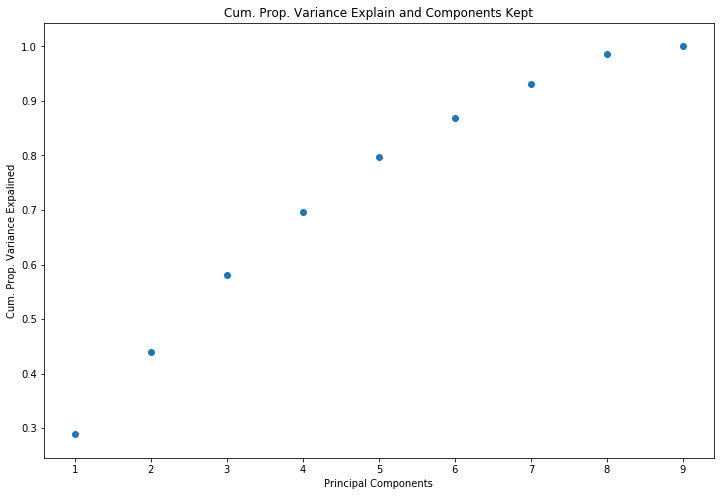

In [0]:
# Find cumulative variance of each principle component
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)

# Chart title
plt.title('Cum. Prop. Variance Explain and Components Kept')

# x-label
plt.xlabel('Principal Components')

# y-label
plt.ylabel('Cum. Prop. Variance Expalined')

# Scatter plot of cumulative variance explained and principal components kept
plt.scatter(num_comp, var_comp_sum)

# Show scattor plot
plt.show()

From the above plot, keeping the first principal component (reducing data into 1D) will only exaplain $26\%$ of the data, but keepign the first five principal component will explain about $81\%$ of the original variation. For this data set, it seem like a decent amount of information is lost if try to reduce the dimension below $5.$ Keeping this in mind, lets visualize the data in 2D (two principal components explaining $47.8\%$ of the data) and in 3D (three principal components explaining $60.7\%$ of the data).

# Visualize Data in 2D and 3D

In [0]:
# Step 4: Project data onto 2d 

# Keep the first two principal components 
# P_reduce is 8 x 2 matrix
P_reduce = np.array(eigvectors_sort[0:2]).transpose()

# Let's project data onto 2D space
# The projected data in 2D will be n x 2 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

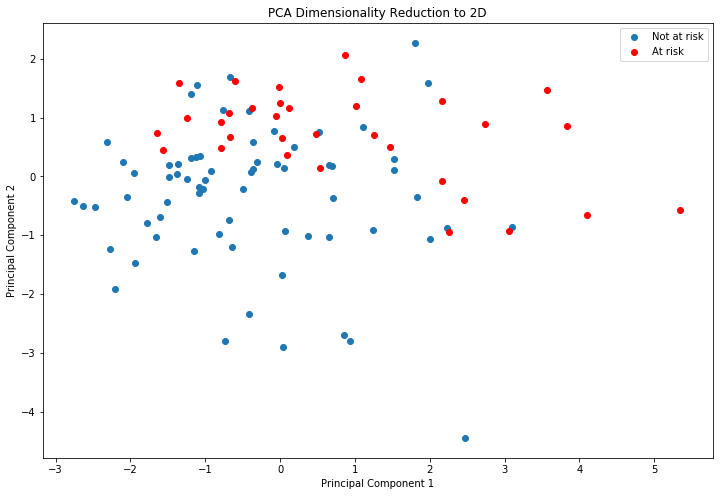

In [0]:
# Visualize data in 2D

# Plot projected the data onto 2D (test non claimers)
negative = plt.scatter(Proj_data_2D[:,0][y == 0], Proj_data_2D[:,1][y == 0])

# Plot projected the data onto 2D (claimers)
positive = plt.scatter(Proj_data_2D[:,0][y == 1], Proj_data_2D[:,1][y == 1], color = "red")


# Chart title
plt.title('PCA Dimensionality Reduction to 2D')

# y-label
plt.ylabel('Principal Component 2')

# x-label
plt.xlabel('Principal Component 1')

# legend
plt.legend([negative,positive],["Not at risk", "At risk"])

# Show scatter plot
plt.show()
plt.rcParams['figure.figsize'] = (12,8)


Recall that this scatter plot with the first two components explains $47.8\%$ of the orginal data variation. Althought we are only capturing half the variation, the above 2D plot shows women with diabetes are in the middle left, and those without diabities in the top right area of the $(PC_{1}, PC_{2})$ space

In [0]:
# Step 4: Project data onto 3d 

# Keep the first three principal components 
# P_reduce is k x 3 matrix
P_reduce = np.array(eigvectors_sort[0:3]).transpose()

# Let's project data onto 3D space
# The projected data in 3D will be n x 3 matrix
Proj_data_3D = np.dot(X_std,P_reduce)

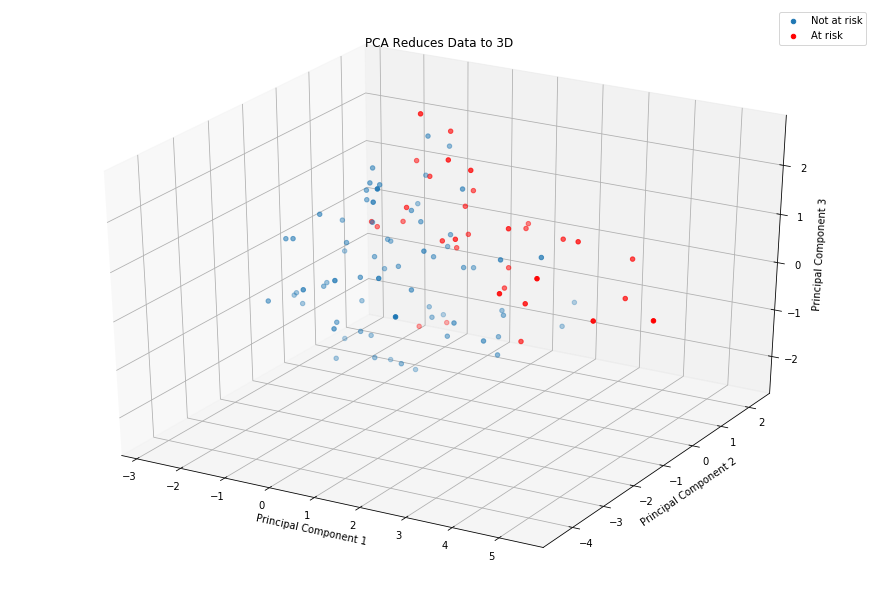

In [0]:
# Visualize data in 3D

# Define 3D figure
fig = plt.figure()
ax = Axes3D(fig)

# Scatter plot in 3D (test negative for diabetes)
negative = ax.scatter(Proj_data_3D[:,0][y == 0], Proj_data_3D[:,1][y == 0], Proj_data_3D[:,2][y == 0])

# Scatter plot in 3D (test positive for diabetes)
positive = ax.scatter(Proj_data_3D[:,0][y == 1], Proj_data_3D[:,1][y == 1], Proj_data_3D[:,2][y == 1], color = "red")

# Title 
ax.set_title('PCA Reduces Data to 3D')

# x-label 
ax.set_xlabel('Principal Component 1')

# y-label
ax.set_ylabel('Principal Component 2')

# z-label
ax.set_zlabel('Principal Component 3')

# legend
plt.legend([negative,positive],["Not at risk", "At risk"])

# Show 3D plot
plt.show()

The 3D plot above uses the first three principal components which contains $60.7\%$ of the original data variation. Clusters of women that have diabities and those who don't can be seen in the above plot in $(PC_{1},PC_{2},PC_{3})$ space.

# Conclusion
We used the PCA to examine the possibilites of reducing a $8$-dimensional data set into lower dimensions. If we wanted to use classification algorithms to predict that chances of having diabities based on the $8$ characteristics, it may be reasonable to use PCA to reduce the data to $5$-dimensions to speed up the algorithm and still retain over $80\%$ of the original data variation. When we use PCA to reduce the data onto $2D$ and $3D$ we can visualize clusters of women that have diabities and those who don't even though much of the original data variation is lost in these lower dimensions.